In [1]:
import tensorflow as tf
tf.__version__

'2.10.0'

## Só o basico do Tensorflow

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import  Image

In [3]:
Hello = tf.constant("Hello, Tensorflow!")
Hello

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Tensorflow!'>

# Origem dos dados 
#### [The CIFAR-10 dataset] (https://www.cs.toronto.edu/~kriz/cifar.html)

In [4]:
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [5]:
nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
# Função para exibir as imagens

def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5,5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i][0]])
    plt.show()

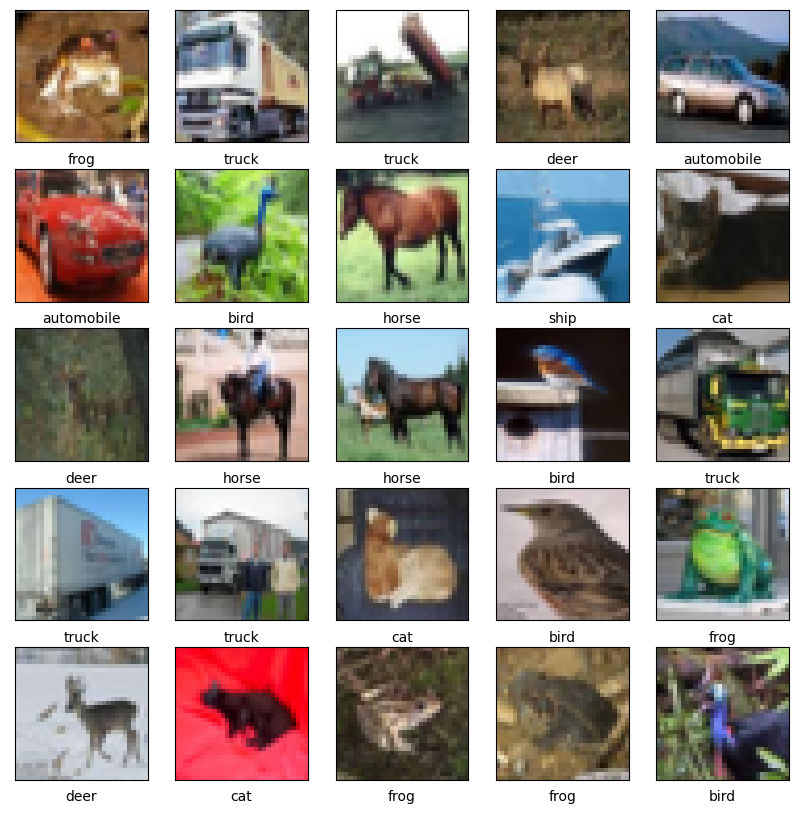

In [7]:
visualiza_imagens(imagens_treino, labels_treino)

In [8]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_testtens = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_testtens.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_testtens.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_testtens.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_testtens.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_testtens.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_testtens.add(layers.MaxPooling2D((2, 2)))

In [9]:
# Adicionar camadas de classificação
modelo_testtens.add(layers.Flatten())
modelo_testtens.add(layers.Dense(64, activation = 'relu'))
modelo_testtens.add(layers.Dense(10, activation = 'softmax'))

In [10]:
# Sumário do modelo
modelo_testtens.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [13]:
# Compilação do modelo
modelo_testtens.compile(optimizer = 'adam',
                       loss = 'sparse_categorical_crossentropy',
                       metrics = ['accuracy'])

In [14]:
%%time
history = modelo_testtens.fit(imagens_treino,
                             labels_treino,
                             epochs = 10,
                             validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.8408 - accuracy: 0.3860 - val_loss: 1.5724 - val_accuracy: 0.4445
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3533 - accuracy: 0.5195 - val_loss: 1.2994 - val_accuracy: 0.5380
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.2123 - accuracy: 0.5738 - val_loss: 1.2009 - val_accuracy: 0.5743
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1171 - accuracy: 0.6090 - val_loss: 1.1469 - val_accuracy: 0.6000
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0428 - accuracy: 0.6369 - val_loss: 1.1323 - val_accuracy: 0.6045
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9809 - accuracy: 0.6592 - val_loss: 1.0630 - val_accuracy: 0.6403
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9352 - accuracy: 0.6757 - val_loss: 1.0199 -

In [17]:
# Avalia o modelo
erro_teste, acc_teste = modelo_testtens.evaluate(imagens_teste, labels_teste, verbose = 2)

313/313 - 2s - loss: 1.0268 - accuracy: 0.6628 - 2s/epoch - 8ms/step


In [19]:
print('Acurácia com Dados de Teste:', acc_teste)

Acurácia com Dados de Teste: 0.6628000140190125


# Deploy do Modelo

In [67]:
# Carrega uma nova imagem
nova_imagem = Image.open("nova_imagem.jpg")

In [68]:
# Dimensões da Imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [69]:
largura = nova_imagem.width
altura = nova_imagem.height
print("A largura da imagem é: ", largura)
print("Aaltura da imagem é: ", altura)

A largura da imagem é:  1919
Aaltura da imagem é:  1199


In [70]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

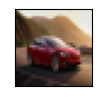

In [71]:
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [72]:
# Converte a imagem para um array numpy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [73]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array= np.expand_dims(nova_imagem_array, axis = 0)

In [74]:
# Previsões
previsoes = modelo_testtens.predict(nova_imagem_array)

1/1 [==============================] - 0s 35ms/step


In [75]:
print(previsoes)

[[0.03095293 0.02255102 0.16636284 0.13010988 0.30302593 0.05839454
  0.20148958 0.02777879 0.03454487 0.02478955]]


In [78]:
# Obtem a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [79]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: deer


###### Algo deu erro, e resultou como veado a imagem.